In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to your dataset
file_path = '/content/drive/MyDrive/AI-dataset/AI Project/geopolymer-concrete-dataset.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [ ]:
# Set display options for more rows/columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Display the dataset
print(df)


         SiO2    Al2O3    Fe2O3       CaO    waste   Na2O  SiO2.1  water  \
0     43.9000  20.1000   4.9600  21.20000   540.00  14.70   29.40  55.90   
1     38.0000  18.7000   4.8600  27.10000   540.00  14.70   29.40  55.90   
2     42.3000  17.9000   4.7300  25.90000   540.00  14.70   29.40  55.90   
3     37.9000  17.4000   3.6700  28.80000   540.00  14.70   29.40  55.90   
4     36.9000  14.0000   3.5200  37.00000   540.00  14.70   29.40  55.90   
5     43.9000  20.1000   4.9600  21.20000   540.00  14.70   29.40  55.90   
6     38.0000  18.7000   4.8600  27.10000   540.00  14.70   29.40  55.90   
7     42.3000  17.9000   4.7300  25.90000   540.00  14.70   29.40  55.90   
8     37.9000  17.4000   3.6700  28.80000   540.00  14.70   29.40  55.90   
9     36.9000  14.0000   3.5200  37.00000   540.00  14.70   29.40  55.90   
10    43.9000  20.1000   4.9600  21.20000   540.00  14.70   29.40  55.90   
11    38.0000  18.7000   4.8600  27.10000   540.00  14.70   29.40  55.90   
12    42.300

In [ ]:
print(df.info())  # Get details on missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SiO2         1548 non-null   float64
 1   Al2O3        1548 non-null   float64
 2   Fe2O3        1548 non-null   float64
 3   CaO          1544 non-null   float64
 4   waste        1361 non-null   float64
 5   Na2O         1432 non-null   float64
 6   SiO2.1       1432 non-null   float64
 7   water        1407 non-null   float64
 8   NaOH         1541 non-null   float64
 9   SS/SH        1510 non-null   float64
 10  coarse       1548 non-null   int64  
 11  fine         1548 non-null   float64
 12  regime       1548 non-null   object 
 13  curing temp  1518 non-null   float64
 14  curing time  1512 non-null   float64
 15  fcu          1548 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 193.6+ KB
None


In [ ]:
# Create three new columns for the classification encoding
df['oven'] = (df['regime'] == 'oven').astype(int)
df['ambient'] = (df['regime'] == 'ambient').astype(int)
df['steam'] = (df['regime'] == 'steam').astype(int)

# Drop the original "regime" column if you no longer need it
df.drop(columns=['regime'], inplace=True)

# Display the updated DataFrame
print(df.head())

   SiO2  Al2O3  Fe2O3   CaO  waste  Na2O  SiO2.1  water  NaOH  SS/SH  coarse  \
0  43.9   20.1   4.96  21.2  540.0  14.7    29.4   55.9  10.0    1.0       0   
1  38.0   18.7   4.86  27.1  540.0  14.7    29.4   55.9  10.0    1.0       0   
2  42.3   17.9   4.73  25.9  540.0  14.7    29.4   55.9  10.0    1.0       0   
3  37.9   17.4   3.67  28.8  540.0  14.7    29.4   55.9  10.0    1.0       0   
4  36.9   14.0   3.52  37.0  540.0  14.7    29.4   55.9  10.0    1.0       0   

     fine  curing temp  curing time      fcu  oven  ambient  steam  
0  2600.0         30.0          4.0  0.16490     1        0      0  
1  2600.0         30.0          4.0  0.33465     1        0      0  
2  2600.0         30.0          4.0  1.67325     1        0      0  
3  2600.0         30.0          4.0  1.00395     1        0      0  
4  2600.0         30.0          4.0  0.66930     1        0      0  


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Replace NaN values in Group 1 ('SiO2', 'Al2O3', 'Fe2O3', 'CaO')

# Calculate the total sum and mean of the Group 1 columns ('SiO2', 'Al2O3', 'Fe2O3', 'CaO')
group1_columns = ['SiO2', 'Al2O3', 'Fe2O3', 'CaO']
row_sums_group1 = df[group1_columns].sum(axis=1)  # Calculate the row-wise sum of Group 1 columns
mean_of_sums_group1 = row_sums_group1.mean()  # Calculate the mean of these sums

# Replace NaN values in Group 1
for col in group1_columns:
    if col != 'CaO':  # For columns other than CaO, follow the usual logic
        # Calculate the sum of the other three variables for each row
        other_vars_sum_group1 = df[group1_columns].sub(df[col], axis=0).sum(axis=1)
        # Replace NaN in the current column using: mean_of_sums_group1 - sum of the other three variables
        df[col] = df[col].fillna(mean_of_sums_group1 - other_vars_sum_group1)
    else:  # For CaO column specifically, use a custom replacement logic
        # Calculate the sum of the other three variables (SiO2, Al2O3, Fe2O3) for each row
        other_vars_sum_group1 = df[['SiO2', 'Al2O3', 'Fe2O3']].sum(axis=1)
        # Replace NaN in CaO with: mean_of_sums_group1 - sum of the other three variables
        df['CaO'] = df['CaO'].fillna(mean_of_sums_group1 - other_vars_sum_group1)


# Step 2: Replace NaN values in Group 2 ('Na2O', 'SiO2.1', 'water')
group2_columns = ['Na2O', 'SiO2.1', 'water']
df[group2_columns] = df[group2_columns].apply(
    lambda row: row.fillna(100 - row.sum()) if row.isna().sum() == 1 else row.fillna(df[group2_columns].mean()),
    axis=1
)

# Step 3: Add sum columns for Group 1 and Group 2
df['group1_sum'] = df[group1_columns].sum(axis=1)
df['group2_sum'] = df[group2_columns].sum(axis=1)

# Step 4: Replace missing values for 'waste', 'NaOH', 'SS/SH'
columns_to_replace = ['waste', 'NaOH', 'SS/SH']
df[columns_to_replace] = df[columns_to_replace].fillna(df[columns_to_replace].mean())

# Step 5: Calculate and replace missing curing temp/time based on regime
regime_means = df.groupby(['oven', 'ambient', 'steam'])[['curing temp', 'curing time']].mean().reset_index()
for index, row in df.iterrows():
    if pd.isna(row['curing temp']) or pd.isna(row['curing time']):
        regime = regime_means[
            (regime_means['oven'] == row['oven']) &
            (regime_means['ambient'] == row['ambient']) &
            (regime_means['steam'] == row['steam'])
        ]
        if pd.isna(row['curing temp']):
            df.at[index, 'curing temp'] = regime['curing temp'].values[0]
        if pd.isna(row['curing time']):
            df.at[index, 'curing time'] = regime['curing time'].values[0]

# Step 6: Remove rows where 'fcu' is NaN or 0
df = df[df['fcu'].notna() & (df['fcu'] != 0)]

# Display the updated dataset
print("Updated DataFrame:")
print(df.head())


Updated DataFrame:
   SiO2  Al2O3  Fe2O3   CaO  waste  Na2O  SiO2.1  water  NaOH  SS/SH  coarse  \
0  43.9   20.1   4.96  21.2  540.0  14.7    29.4   55.9  10.0    1.0       0   
1  38.0   18.7   4.86  27.1  540.0  14.7    29.4   55.9  10.0    1.0       0   
2  42.3   17.9   4.73  25.9  540.0  14.7    29.4   55.9  10.0    1.0       0   
3  37.9   17.4   3.67  28.8  540.0  14.7    29.4   55.9  10.0    1.0       0   
4  36.9   14.0   3.52  37.0  540.0  14.7    29.4   55.9  10.0    1.0       0   

     fine  curing temp  curing time      fcu  oven  ambient  steam  \
0  2600.0         30.0          4.0  0.16490     1        0      0   
1  2600.0         30.0          4.0  0.33465     1        0      0   
2  2600.0         30.0          4.0  1.67325     1        0      0   
3  2600.0         30.0          4.0  1.00395     1        0      0   
4  2600.0         30.0          4.0  0.66930     1        0      0   

   group1_sum  group2_sum  
0       90.16       100.0  
1       88.66       100

In [ ]:
output_path = '/content/drive/MyDrive/AI-dataset/modified_dataset.xlsx'
df.to_excel(output_path, index=False)
print(f"Dataset saved to {output_path}")

Dataset saved to /content/drive/MyDrive/AI-dataset/modified_dataset.xlsx


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SiO2         1523 non-null   float64
 1   Al2O3        1523 non-null   float64
 2   Fe2O3        1523 non-null   float64
 3   CaO          1523 non-null   float64
 4   waste        1523 non-null   float64
 5   Na2O         1523 non-null   float64
 6   SiO2.1       1523 non-null   float64
 7   water        1523 non-null   float64
 8   NaOH         1523 non-null   float64
 9   SS/SH        1523 non-null   float64
 10  coarse       1523 non-null   int64  
 11  fine         1523 non-null   float64
 12  curing temp  1523 non-null   float64
 13  curing time  1523 non-null   float64
 14  fcu          1523 non-null   float64
 15  oven         1523 non-null   int64  
 16  ambient      1523 non-null   int64  
 17  steam        1523 non-null   int64  
 18  group1_sum   1523 non-null   float64
 19  group2_sum 

In [ ]:
# Define features (X) and target (y)
X = df[['SiO2', 'Al2O3', 'Fe2O3', 'CaO','waste', 'Na2O', 'SiO2.1', 'water', 'NaOH', 'SS/SH','coarse','fine','curing temp', 'curing time','oven','ambient','steam']]
y = df['fcu']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=125)

# Step 3: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_features': ['sqrt', 'log2', None]
}

# Step 4: Initialize the model
regressor = GradientBoostingRegressor(random_state=125)

# Step 5: Perform Grid Search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel())

# Step 6: Evaluate the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Score (R2):", best_score)

# Step 7: Test performance on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set R2 Score:", test_score)

# Additional evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1000)



In [ ]:
# Train the GradientBoostingRegressor
regressor = GradientBoostingRegressor(max_depth=8, min_samples_leaf=1, max_features= 4 , learning_rate= 0.05, n_estimators= 100 ,random_state=1000)
model = regressor.fit(X_train, y_train.values.ravel())

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

0.9237048534491011


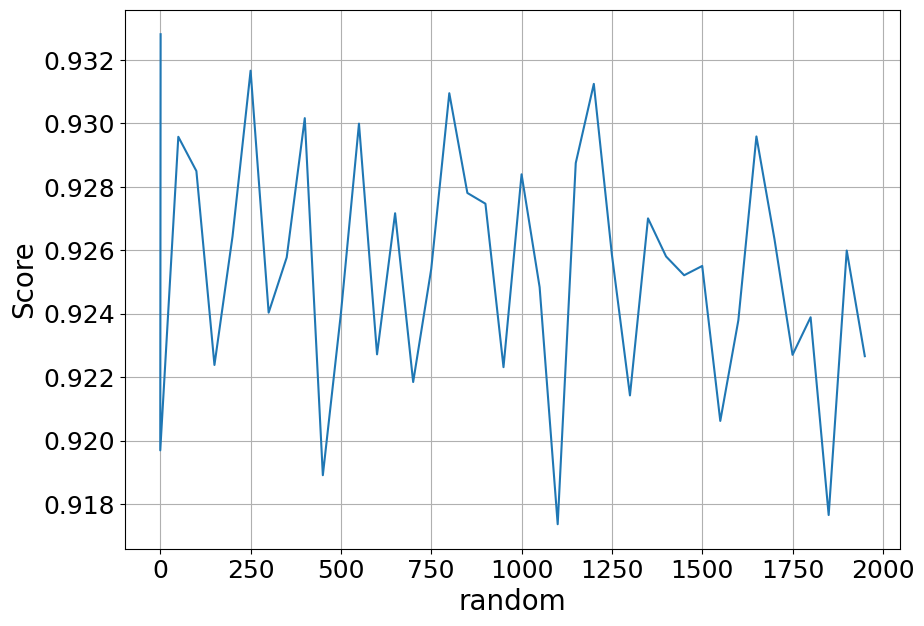

In [ ]:
estimator_range = [1] + list(range(0, 2000, 50))
scores = []
for estimator in estimator_range:
 reg =GradientBoostingRegressor(max_depth=8, min_samples_leaf=1, max_features= 4 , learning_rate= 0.1, n_estimators=100, random_state=estimator)
 reg.fit(X_train, y_train.values.ravel())
 scores.append(reg.score(X_test, y_test))

plt.figure(figsize = (10,7))
plt.plot(estimator_range, scores);
plt.xlabel('random', fontsize =20);


plt.ylabel('Score', fontsize = 20);
plt.tick_params(labelsize = 18)
plt.grid()

In [ ]:
# Train and evaluate with a specific random state
regressor = GradientBoostingRegressor(max_depth=8, min_samples_leaf=1, max_features= 4 , learning_rate= 0.1, n_estimators= 100, random_state=250)
model = regressor.fit(X_train, y_train.values.ravel())

# Test and Train Scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9971268827245027
Test Score: 0.9316581477197018


In [2]:
y_test_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE):", mae)

NameError: name 'model' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 5.08236505817156


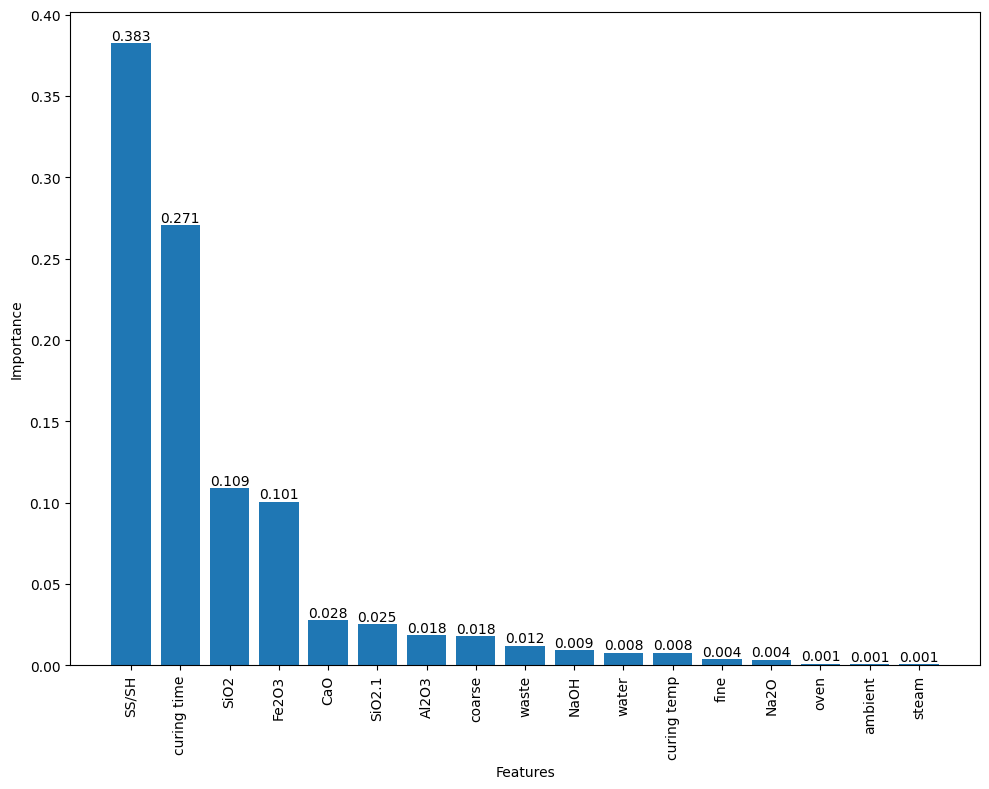

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define feature names manually (since X is a NumPy array)
feature_names = ['SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'waste', 'Na2O',
                 'SiO2.1', 'water', 'NaOH', 'SS/SH', 'coarse', 'fine',
                 'curing temp', 'curing time', 'oven', 'ambient', 'steam']

# Get feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 8))
bars = plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()

# Add the importance values as text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()




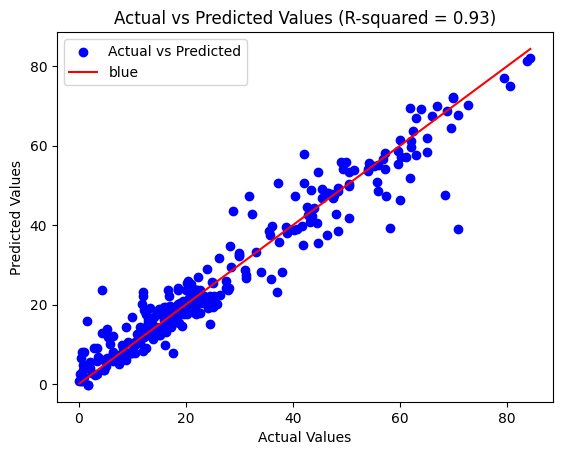

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_pred)
# Create scatter plot of actual vs predicted values
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
# Add ideal line for perfect correlation
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label = 'blue')
# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (R-squared = {:.2f})'.format(r2))
# Add legend
plt.legend()
# Display the plot
plt.show()


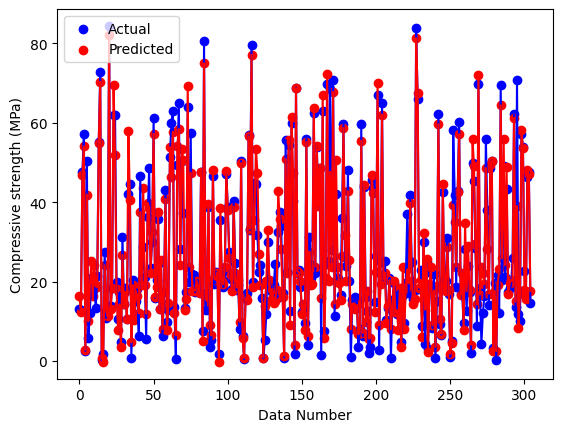

In [ ]:
import numpy as np
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test_pred)), y_test_pred, color='red', label='Predicted')
y_test = np.array(y_test)
y_test_pred= np.array(y_test_pred)
plt.plot(np.arange(len(y_test)), y_test, color='blue')
plt.plot(np.arange(len(y_test_pred)), y_test_pred, color='red')
plt.xlabel('Data Number')
plt.ylabel('Compressive strength (MPa)')
plt.legend(loc='upper left')
plt.show()